In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi


In [2]:
import pandas as pd
import numpy as np
import sklearn # scikit-learn kutubxonasi
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [5]:
df.district.value_counts()

Чиланзарский         1641
Мирзо-Улугбекский    1382
Юнусабадский          883
Учтепинский           880
Мирабадский           773
Яккасарайский         658
Яшнободский           484
Шайхантахурский       396
Олмазорский           269
Сергелийский          175
Янгихаётский           16
Бектемирский            8
Name: district, dtype: int64

In [6]:
df['size'].value_counts()

60       379
70       377
50       337
65       255
80       252
        ... 
77.47      1
46.70      1
88.90      1
49.88      1
27.50      1
Name: size, Length: 407, dtype: int64

In [7]:
df['size'].unique()

array(['57', '52', '42', '65', '70', '28', '30', '32', '51', '67', '35',
       '43', '90', '80', '69', '96', '76', '45', '27', '64', '26', '72',
       '100', '63', '48', '102', '78', '34', '56', '98', '93', '60', '82',
       '120', '110', '95', '68', '46', '40', '53', '54', '20', '50', '36',
       '58', '74', '94', '85', '125', '64.67', '22', '66', '37', '61',
       '69.65', '88', '38', '55.13', '91', '111', '107', '62', '40.41',
       '75', '84', '117', '47', '33', '187', '29', '11', '122', '119',
       '164', '92', '55', '89', '208', '44', '86', '150', '56.10', '83',
       '49', '142', '115', '350', '81', '89.55', '59', '145', '116', '77',
       '24', '41', '255', '266', '210', '55.62', '140', '141', '60.94',
       '165', '215', '66.82', '128', '97', '130', '105', '137', '47.14',
       '71', '160', '118', '152', '21', '104', '180', '109', '135', '73',
       '39', '39.11', '157', '112', '93.22', '106', '214', '235', '16',
       '300', '57.95', '79', '5', '53.06', '62.50',

In [8]:
df[df['size']=='Площадьземли:1сот']

,location,district,rooms,size,level,max_levels,price
5347,"город Ташкент, Яшнободский район, Дархон",Яшнободский,4,Площадьземли:1сот,3,5,150000


In [9]:
df.drop_duplicates()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38,5,5,24500
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49,1,4,32000
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64,3,9,40000
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18,1,4,11000


In [10]:
df = df[df['size']!='Площадьземли:1сот']

In [11]:
df['size']=df['size'].astype(float)

<ipython-input-11-f2ad01bda536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size']=df['size'].astype(float)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7564 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7564 non-null   object 
 1   district    7564 non-null   object 
 2   rooms       7564 non-null   int64  
 3   size        7564 non-null   float64
 4   level       7564 non-null   int64  
 5   max_levels  7564 non-null   int64  
 6   price       7564 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 472.8+ KB


In [13]:
df = df[df['price']!='Договорная']

In [14]:
df['price']=df['price'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7465 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7465 non-null   object 
 1   district    7465 non-null   object 
 2   rooms       7465 non-null   int64  
 3   size        7465 non-null   float64
 4   level       7465 non-null   int64  
 5   max_levels  7465 non-null   int64  
 6   price       7465 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 466.6+ KB


In [16]:
df.describe()

,rooms,size,level,max_levels,price
count,7465.000000,7465.000000,7465.000000,7465.000000,7.465000e+03
mean,2.622103,113.537018,3.693771,6.023979,7.132367e+04
std,1.083155,1501.157996,2.236905,2.607103,6.405659e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,65.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,85.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


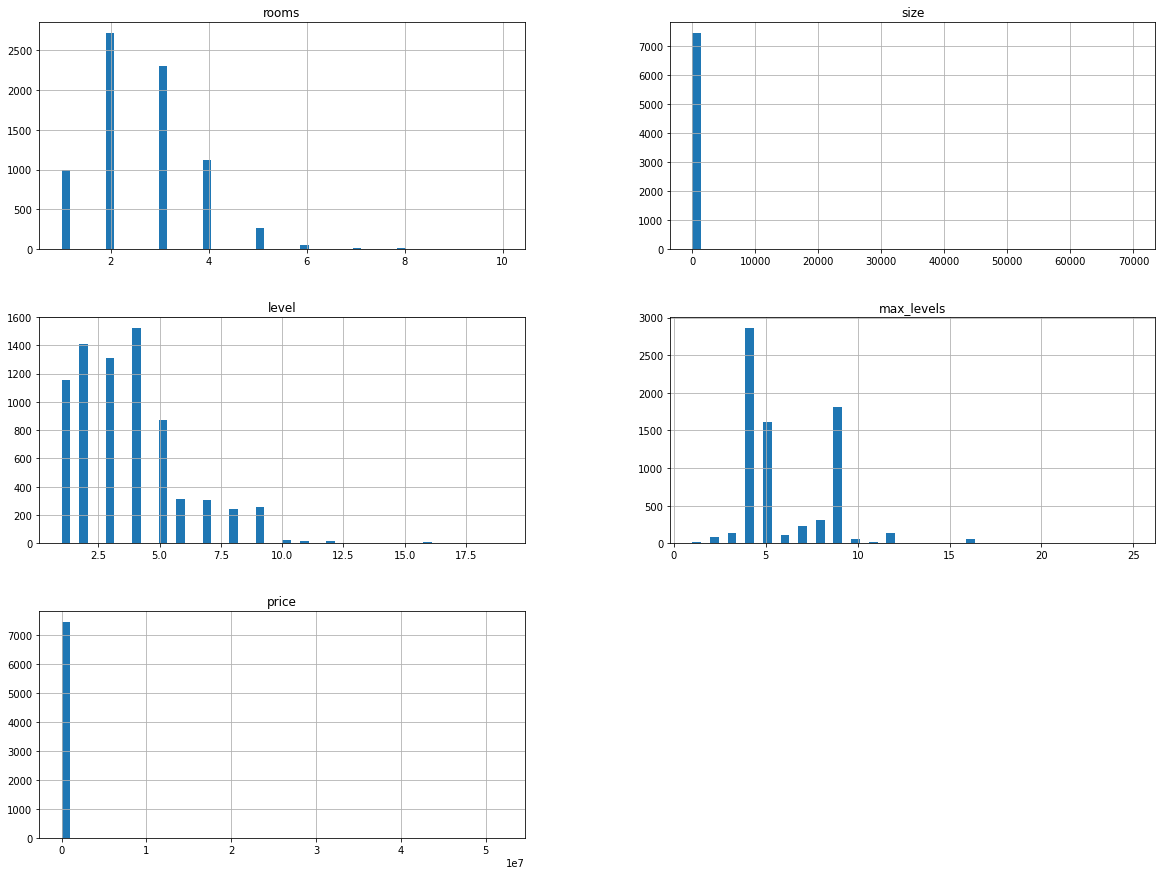

In [17]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [18]:
df.price.min()

2

In [19]:
df[df.price==2]

,location,district,rooms,size,level,max_levels,price
7224,"город Ташкент, Учтепинский район, Чиланзар-11",Учтепинский,2,51.0,2,4,2


In [20]:
df[df.price<10000]

,location,district,rooms,size,level,max_levels,price
195,"город Ташкент, Мирзо-Улугбекский район, Массив...",Мирзо-Улугбекский,1,11.0,3,9,7500
273,"город Ташкент, Яккасарайский район, Нукус",Яккасарайский,3,100.0,3,4,1000
1827,"город Ташкент, Мирзо-Улугбекский район, Хирмон...",Мирзо-Улугбекский,6,400.0,1,2,2000
3145,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,14.0,3,4,8000
3695,"город Ташкент, Яшнободский район, Авиасозлар-2...",Яшнободский,1,12.0,2,9,8999
3832,"город Ташкент, Яккасарайский район, Абдуллы Ка...",Яккасарайский,4,170.0,2,6,2000
4089,"город Ташкент, Шайхантахурский район, Актепа",Шайхантахурский,6,500.0,2,2,1800
5073,"город Ташкент, Сергелийский район, Srrgili 8uc...",Сергелийский,2,54.0,7,7,2864
5719,"город Ташкент, Шайхантахурский район, Караташ",Шайхантахурский,7,230.0,2,5,1000
7224,"город Ташкент, Учтепинский район, Чиланзар-11",Учтепинский,2,51.0,2,4,2


In [21]:
df[df.price>1000000]

,location,district,rooms,size,level,max_levels,price
330,"город Ташкент, Яшнободский район, 1-й переулок...",Яшнободский,2,68.0,5,8,1666000
1744,"город Ташкент, Олмазорский район, Toshmi",Олмазорский,3,84.0,1,5,3780000
5903,"город Ташкент, Учтепинский район, Chtepa Fozil...",Учтепинский,4,72.0,2,5,52000000
6133,"город Ташкент, Юнусабадский район, город Ташке...",Юнусабадский,3,42.0,3,4,1344000
6517,"город Ташкент, Юнусабадский район, Юнусабад 5к...",Юнусабадский,3,80.0,8,9,4240000
6952,"город Ташкент, Шайхантахурский район, Алишера ...",Шайхантахурский,3,114.0,5,7,15504000
7081,"город Ташкент, Чиланзарский район, Тирсакобод",Чиланзарский,2,85.0,2,3,6630000
7296,"город Ташкент, Яшнободский район, Садыка Азимо...",Яшнободский,4,96.0,2,5,5568000
7466,"город Ташкент, Чиланзарский район, 1-й проезд ...",Чиланзарский,2,42.0,1,3,1470000


In [22]:
df = df[(df.price>10000) & (df.price<1000000)]

In [23]:
df.describe()

,rooms,size,level,max_levels,price
count,7442.000000,7442.000000,7442.000000,7442.000000,7442.000000
mean,2.621741,113.578318,3.696184,6.026874,59146.177103
std,1.080561,1503.461080,2.237782,2.608037,46748.600916
min,1.000000,1.000000,1.000000,1.000000,10500.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,3.000000,65.000000,3.000000,5.000000,46500.000000
75%,3.000000,85.000000,5.000000,9.000000,67000.000000
max,10.000000,70000.000000,19.000000,25.000000,800000.000000


In [24]:
df[df.price>500000]

,location,district,rooms,size,level,max_levels,price
1695,"город Ташкент, Мирабадский район, Фидокор (Чех...",Мирабадский,10,456.0,3,7,800000
3625,"город Ташкент, Мирабадский район, Тараса Шевченко",Мирабадский,5,225.0,5,8,530000
3656,"город Ташкент, Мирзо-Улугбекский район, Дархан",Мирзо-Улугбекский,5,336.0,8,9,504000
4935,"город Ташкент, Чиланзарский район, Катта козир...",Чиланзарский,1,28.0,3,4,644000
5118,"город Ташкент, Мирабадский район, Фидокор (Чех...",Мирабадский,10,456.0,3,7,800000
7478,"город Ташкент, Чиланзарский район, Катта козир...",Чиланзарский,1,28.0,3,4,644000


In [25]:
df = df[df.price!=644000]

In [26]:
df[df.price>500000]

,location,district,rooms,size,level,max_levels,price
1695,"город Ташкент, Мирабадский район, Фидокор (Чех...",Мирабадский,10,456.0,3,7,800000
3625,"город Ташкент, Мирабадский район, Тараса Шевченко",Мирабадский,5,225.0,5,8,530000
3656,"город Ташкент, Мирзо-Улугбекский район, Дархан",Мирзо-Улугбекский,5,336.0,8,9,504000
5118,"город Ташкент, Мирабадский район, Фидокор (Чех...",Мирабадский,10,456.0,3,7,800000


In [27]:
df.describe()

,rooms,size,level,max_levels,price
count,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000
mean,2.622177,113.601323,3.696371,6.027419,58988.958333
std,1.080379,1503.662517,2.238054,2.608176,45760.596240
min,1.000000,1.000000,1.000000,1.000000,10500.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,3.000000,65.000000,3.000000,5.000000,46500.000000
75%,3.000000,85.000000,5.000000,9.000000,66885.250000
max,10.000000,70000.000000,19.000000,25.000000,800000.000000


In [28]:
df[df['size']>500]

,location,district,rooms,size,level,max_levels,price
981,"город Ташкент, Мирабадский район, Массив Куйлю...",Мирабадский,3,7359.0,2,4,46500
2268,"город Ташкент, Мирзо-Улугбекский район, Ахмад ...",Мирзо-Улугбекский,1,24500.0,2,5,24500
2547,"город Ташкент, Юнусабадский район, Киёт",Юнусабадский,3,70000.0,2,4,76000
2662,"город Ташкент, Учтепинский район, Учтепинский ...",Учтепинский,1,3448.0,5,5,25000
3089,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,2,44000.0,3,4,44000
4615,"город Ташкент, Олмазорский район, Метро Тынчлик",Олмазорский,4,69000.0,3,4,69000
4784,"город Ташкент, Мирабадский район, Массив Куйлюк1",Мирабадский,3,7359.0,2,4,46500
5456,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,3,67000.0,2,5,67000
7043,"город Ташкент, Олмазорский район, Олмазорский ...",Олмазорский,4,7407.0,4,4,44000
7421,"город Ташкент, Юнусабадский район, Хасанбой",Юнусабадский,8,2100.0,1,1,265000


In [29]:
df = df[df['size']<500]

In [30]:
df.describe()

,rooms,size,level,max_levels,price
count,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000
mean,2.621400,73.084904,3.697847,6.030148,58973.129206
std,1.078679,37.040491,2.238825,2.608560,45723.720840
min,1.000000,1.000000,1.000000,1.000000,10500.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,3.000000,65.000000,3.000000,5.000000,46500.000000
75%,3.000000,85.000000,5.000000,9.000000,66500.000000
max,10.000000,456.000000,19.000000,25.000000,800000.000000


In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.describe()

,rooms,size,level,max_levels,price
count,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000
mean,2.622067,73.193990,3.710722,6.047966,59179.926789
std,1.070177,36.744646,2.257666,2.621289,45075.588829
min,1.000000,1.000000,1.000000,1.000000,10500.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,3.000000,66.000000,3.000000,5.000000,46500.000000
75%,3.000000,85.000000,5.000000,9.000000,67000.000000
max,10.000000,456.000000,19.000000,25.000000,800000.000000


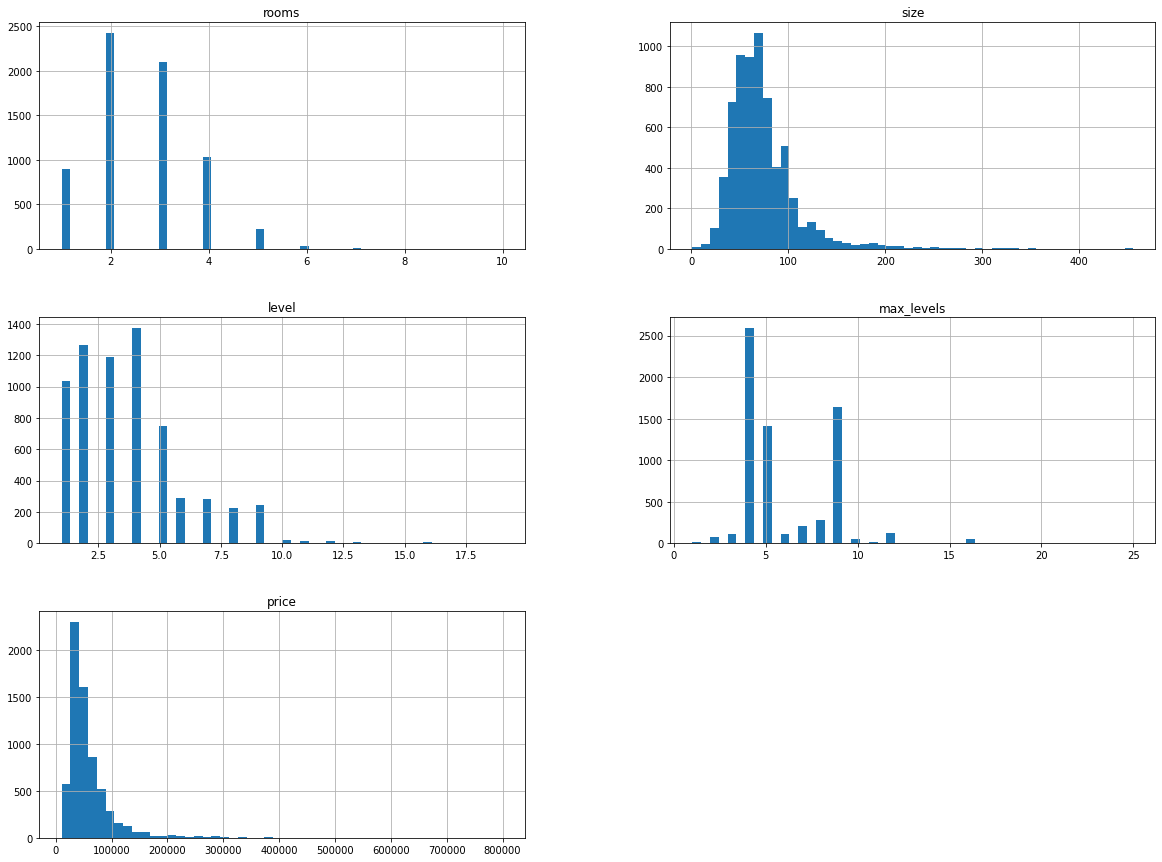

In [33]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [35]:
df['rooms_cat'] = pd.cut(df['rooms'], bins=[0, 1, 2, 4, 6, np.inf], labels=[1,2,3,4,5])

from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_test_indices = next(stratified_split.split(df, df['rooms_cat']))
train_index = train_test_indices[0]
test_index = train_test_indices[1]

In [36]:
df.index.isin(train_index).sum()

4825

In [37]:
strat_train_set = df[df.index.isin(train_index)]
strat_test_set = df[~df.index.isin(train_index)]

In [38]:
strat_train_set.head()

,location,district,rooms,size,level,max_levels,price,rooms_cat
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000,3
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000,2
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000,2
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500,3
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000,3


In [39]:
strat_train_set.drop('rooms_cat', axis=1, inplace=True)
strat_test_set.drop('rooms_cat', axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [93]:
strat_test_set = strat_test_set.drop('location', axis=1)

In [115]:
X_train = strat_test_set.copy()

In [40]:
housing = strat_train_set.drop("price", axis=1)
housing_labels = strat_train_set["price"].copy()

In [94]:
strat_train_set["price"]

0        52000
1        56000
2        37000
3        49500
4        55000
         ...  
6726     25000
6727    280000
6729     35500
6730     26500
6732     24000
Name: price, Length: 4825, dtype: int64

In [95]:
y = housing_labels

In [41]:
# SimpleImputer klassini chaqiramiz
from sklearn.impute import SimpleImputer
# SimpleImputer klassidan yangi obyekt yaratamiz va NaN qiymatlarni median qiymat bilan to'ldirishni ko'rsatamiz
imputer = SimpleImputer(strategy="median")

In [45]:
housing_num = housing.drop(columns = ['location', 'district'], axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [46]:
imputer.statistics_

array([ 3., 67.,  3.,  5.])

In [97]:
X = imputer.transform(housing_num)

In [48]:
type(X)

numpy.ndarray

In [98]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [99]:
housing_tr.head()

,rooms,size,level,max_levels
0,3.0,57.0,4.0,4.0
1,2.0,52.0,4.0,5.0
2,2.0,42.0,4.0,4.0
3,3.0,65.0,1.0,4.0
4,3.0,70.0,3.0,5.0


In [101]:
housing_cat = housing[['district']]

In [100]:
housing_cat[['district']].head(10)

,district
0,Юнусабадский
1,Яккасарайский
2,Чиланзарский
3,Чиланзарский
4,Чиланзарский
5,Чиланзарский
7,Яккасарайский
9,Чиланзарский
10,Учтепинский
11,Чиланзарский


In [102]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[8.],
       [9.],
       [6.],
       [6.],
       [6.],
       [6.],
       [9.],
       [6.],
       [5.],
       [6.]])

In [103]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [104]:
housing_cat.head(10)

,district
0,Юнусабадский
1,Яккасарайский
2,Чиланзарский
3,Чиланзарский
4,Чиланзарский
5,Чиланзарский
7,Яккасарайский
9,Чиланзарский
10,Учтепинский
11,Чиланзарский


In [105]:
from sklearn.preprocessing import StandardScaler
standart_scaler = StandardScaler()
standart_scaler.fit_transform(housing_num)

array([[ 0.34263871, -0.45858587,  0.12474589, -0.79339016],
       [-0.59244713, -0.5933324 ,  0.12474589, -0.41038791],
       [-0.59244713, -0.86282546,  0.12474589, -0.79339016],
       ...,
       [-0.59244713, -0.64723101, -1.20688893, -0.41038791],
       [-1.52753298, -0.86282546, -0.31913238,  1.12162111],
       [-1.52753298, -0.78197754,  0.56862417, -0.41038791]])

In [106]:
housing_onehot = pd.get_dummies(housing['district'])
housing_onehot

,Бектемирский,Мирабадский,Мирзо-Улугбекский,Олмазорский,Сергелийский,Учтепинский,Чиланзарский,Шайхантахурский,Юнусабадский,Яккасарайский,Янгихаётский,Яшнободский
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6726,0,0,0,0,0,0,1,0,0,0,0,0
6727,0,0,0,0,0,0,0,0,1,0,0,0
6729,0,0,0,0,0,0,1,0,0,0,0,0
6730,0,0,0,0,0,0,1,0,0,0,0,0


In [107]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='median')),
          ('std_scaler', StandardScaler())             
])

In [108]:
num_pipeline.fit_transform(housing_num)

array([[ 0.34263871, -0.45858587,  0.12474589, -0.79339016],
       [-0.59244713, -0.5933324 ,  0.12474589, -0.41038791],
       [-0.59244713, -0.86282546,  0.12474589, -0.79339016],
       ...,
       [-0.59244713, -0.64723101, -1.20688893, -0.41038791],
       [-1.52753298, -0.86282546, -0.31913238,  1.12162111],
       [-1.52753298, -0.78197754,  0.56862417, -0.41038791]])

In [109]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [110]:
housing_prepared = full_pipeline.fit_transform(housing)

In [67]:
housing_prepared[0:5,:]

array([[ 0.34263871, -0.45858587,  0.12474589, -0.79339016,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-0.59244713, -0.5933324 ,  0.12474589, -0.41038791,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [-0.59244713, -0.86282546,  0.12474589, -0.79339016,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.34263871, -0.24299142, -1.20688893, -0.79339016,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.34263871, -0.10824489, -0

In [111]:
X_prepared = full_pipeline.fit_transform(housing)

In [112]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

In [113]:
LR_model.fit(X_prepared, y)

LinearRegression()

In [130]:
test_data = X_train.sample(5)
test_data

,district,rooms,size,level,max_levels,price
7285,Мирзо-Улугбекский,1,33.00,3,4,21800
7185,Чиланзарский,4,98.00,4,4,52000
4329,Учтепинский,2,47.00,1,4,31500
1973,Учтепинский,1,40.00,1,4,25500
7373,Олмазорский,5,96.25,4,4,50000


In [131]:
Y = test_data['price']

In [132]:
test_data = test_data.drop('price', axis=1)

In [133]:
test_label = Y.loc[test_data.index]
test_label

7285    21800
7185    52000
4329    31500
1973    25500
7373    50000
Name: price, dtype: int64

In [134]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

array([[-1.52753298, -1.10536921, -0.31913238, -0.79339016,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.27772455,  0.64633568,  0.12474589, -0.79339016,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.59244713, -0.72807893, -1.20688893, -0.79339016,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.52753298, -0.91672407, -1.20688893, -0.79339016,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 2.21281039,  0.59917439,  0

In [135]:
predicted_data = LR_model.predict(test_data_prepared)
predicted_data

array([26761.6223278 , 72309.53479085, 32998.2513363 , 30419.70402893,
       57209.074179  ])

In [136]:
pd.DataFrame({'Prognoz':predicted_data, 'Real baxosi': test_label})

,Prognoz,Real baxosi
7285,26761.622328,21800
7185,72309.534791,52000
4329,32998.251336,31500
1973,30419.704029,25500
7373,57209.074179,50000


In [144]:
y_test = X_train['price']
y_test

6       21200
8       26200
16      22500
23      47000
25      76000
        ...  
7560    24500
7561    32000
7562    40000
7563    11000
7564    22914
Name: price, Length: 1909, dtype: int64

In [145]:
X_test = X_train.drop('price', axis=1)

In [137]:
X_test_prepared = full_pipeline.transform(X_test)

In [138]:
y_predicted = LR_model.predict(X_test_prepared)

In [146]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

25263.34064916046


In [143]:
Y

7285    21800
7185    52000
4329    31500
1973    25500
7373    50000
Name: price, dtype: int64

In [147]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared, y)

DecisionTreeRegressor()

In [150]:
y_predicted = Tree_model.predict(X_test_prepared)

In [151]:
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

28908.236904666177


In [152]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

In [153]:
y_predicted = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

23150.268549589928


In [155]:
df = df.drop('location', axis=1)
X = df.drop("price", axis=1)
y = df["price"].copy()

X_prepared = full_pipeline.transform(X)

In [156]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [157]:
from sklearn.model_selection import cross_val_score

In [158]:
scores = cross_val_score(LR_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)

In [159]:
display_scores(LR_rmse_scores)

Scores: [19069.65931353 19636.71761571 32029.66800821 30053.6394493
 24146.64133377 32159.37704313 31029.15428641 24893.94705179
 23494.16096038 16907.17449173]
Mean: 25342.01395539688
Std.dev: 5420.587904832454


In [160]:
scores = cross_val_score(Tree_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [22889.75683625 23634.08217681 40710.51747399 32584.50934103
 29387.50378257 31927.82821405 35302.71609248 31367.22744602
 28558.28836496 17685.47399732]
Mean: 29404.790372547803
Std.dev: 6298.717812878796


In [161]:
scores = cross_val_score(Tree_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [24305.50856788 23433.13257539 39651.50215189 33047.52596789
 29783.83707091 33147.42213045 34908.00938951 30623.72764424
 28828.45856799 19021.61869174]
Mean: 29675.07427579027
Std.dev: 5772.885515845658


In [162]:
import pickle

filename = 'RF_model.pkl' # faylga istalgan nom beramiz
with open(filename, 'wb') as file:
    pickle.dump(RF_model, file)

In [164]:
with open(filename, 'rb') as file:
    model = pickle.load(file)

In [165]:
scores = cross_val_score(model, X_prepared, y, scoring="neg_mean_squared_error", cv=5)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [17548.90013975 30096.6960443  24781.37216608 26700.51045134
 18726.27998218]
Mean: 23570.751756730337
Std.dev: 4766.1419151714845


In [166]:
import joblib

filename = 'RF_model.jbl' # faylga istalgan nom beramiz
joblib.dump(RF_model, filename)

['RF_model.jbl']

In [167]:
model = joblib.load(filename)

In [168]:
scores = cross_val_score(model, X_prepared, y, scoring="neg_mean_squared_error", cv=5)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [17527.00123687 30894.05553254 24726.71631458 26434.0254544
 18931.11614339]
Mean: 23702.58293635434
Std.dev: 4922.024180980866


In [169]:
filename = 'pipeline.jbl'
joblib.dump(full_pipeline, filename)

['pipeline.jbl']